## Make an OBJ File

In [1]:
%%writefile arena2.obj
# Blender v2.76 (sub 0) OBJ File: 'grass_scene.blend'
# www.blender.org
mtllib arena.mtl
o Arena
v 0.458754 -0.249638 0.784839
v 0.282820 -0.252262 -0.827229
v 0.509388 0.383429 -1.094238
v 0.736085 0.383428 0.995493
v -0.250075 -0.260501 0.854436
v -0.422153 -0.263066 -0.751096
v -0.695970 0.383429 -0.971152
v -0.470450 0.383428 1.120951
vt 0.571098 0.207537
vt 0.772412 0.211344
vt 0.882727 0.087157
vt 0.463593 0.109177
vt 0.582023 0.305221
vt 0.756790 0.296619
vt 0.882727 0.413408
vt 0.455877 0.396195
vn -0.923200 0.371100 0.100100
vn -0.923200 0.371100 0.100200
vn 0.928000 0.359000 -0.100000
vn -0.096800 0.352200 -0.930900
vn 0.094900 0.356600 0.929400
vn 0.095000 0.356600 0.929400
vn -0.015400 0.999900 0.000100
vn -0.015200 0.999900 -0.000300
usemtl None
s 1
f 1/1/1 2/2/2 3/3/1
f 1/1/1 3/3/1 4/4/2
f 5/5/3 6/6/3 7/7/3
f 5/5/3 7/7/3 8/8/3
f 1/1/4 5/5/4 8/8/4
f 1/1/4 8/8/4 4/4/4
f 2/2/5 6/6/6 7/7/5
f 2/2/5 7/7/5 3/3/6
f 1/1/7 5/5/7 6/6/7
f 1/1/8 6/6/8 2/2/8


Overwriting arena2.obj


## Read It

In [12]:
%matplotlib inline

#!pip install wavefront_reader

In [3]:
import wavefront_reader

In [4]:
objs = wavefront_reader.read_objfile("arena2.obj")

In [5]:
objs.keys()

dict_keys(['Arena'])

### Get Vertices

In [6]:
verts = objs['Arena']['v']
verts[:10, :]

array([[ 0.458754, -0.249638,  0.784839],
       [ 0.28282 , -0.252262, -0.827229],
       [ 0.509388,  0.383429, -1.094238],
       [ 0.458754, -0.249638,  0.784839],
       [ 0.509388,  0.383429, -1.094238],
       [ 0.736085,  0.383428,  0.995493],
       [-0.250075, -0.260501,  0.854436],
       [-0.422153, -0.263066, -0.751096],
       [-0.69597 ,  0.383429, -0.971152],
       [-0.250075, -0.260501,  0.854436]])

### Get Unique Vertices for arena

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
uverts = np.unique(verts, axis=0)

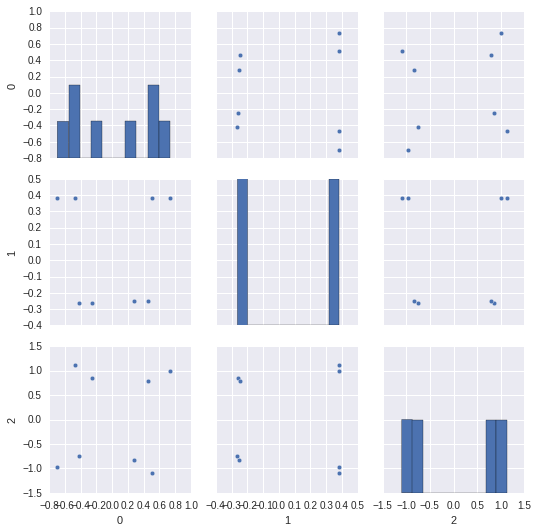

In [13]:
sns.pairplot(pd.DataFrame(uverts));

### Get the Floor Vertices (minimimum 4 Y verts)

In [58]:
floor_verts = uverts[uverts[:,1].argsort()][:4, :]
floor_verts

array([[-0.422153, -0.263066, -0.751096],
       [-0.250075, -0.260501,  0.854436],
       [ 0.28282 , -0.252262, -0.827229],
       [ 0.458754, -0.249638,  0.784839]])

In [61]:
top_verts = uverts[uverts[:,1].argsort()][-4:, :]
top_verts

array([[-0.47045 ,  0.383428,  1.120951],
       [ 0.736085,  0.383428,  0.995493],
       [-0.69597 ,  0.383429, -0.971152],
       [ 0.509388,  0.383429, -1.094238]])

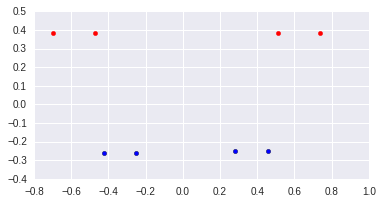

In [63]:
plt.scatter(x=floor_verts[:, 0], y=floor_verts[:, 1]);
plt.scatter(x=top_verts[:, 0], y=top_verts[:, 1], color='red');
plt.gca().set_aspect('equal');

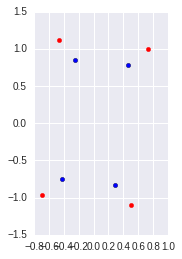

In [64]:
plt.scatter(x=floor_verts[:, 0], y=floor_verts[:, 2]);
plt.scatter(x=top_verts[:, 0], y=top_verts[:, 2], color='red');
plt.gca().set_aspect('equal');

### Find the Orientation of the Floor

In [17]:
from sklearn.decomposition import PCA

In [18]:
model = PCA(n_components=3)
model.fit(floor_verts)
model.components_

array([[ 1.08733909e-01,  1.62176600e-03,  9.94069568e-01],
       [-9.93952849e-01, -1.52329476e-02,  1.08745994e-01],
       [-1.53189702e-02,  9.99882657e-01,  4.43790033e-05]])

In [19]:
model.explained_variance_

array([8.72850060e-01, 1.68374058e-01, 3.78749809e-15])

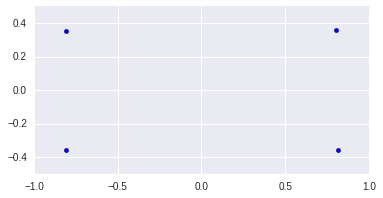

In [20]:
new_verts = model.transform(floor_verts)
plt.scatter(x=new_verts[:, 0], y=new_verts[:, 1]);
plt.gca().set_aspect('equal');

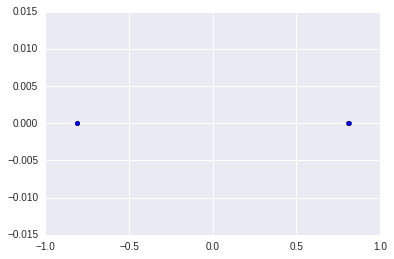

In [21]:
plt.scatter(x=new_verts[:, 0], y=new_verts[:, 2]);

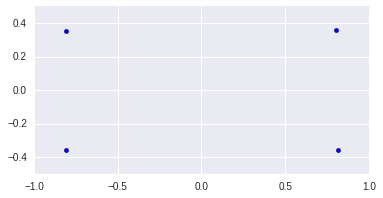

In [22]:
new_verts = (floor_verts - model.mean_) @ model.components_.T
plt.scatter(x=new_verts[:, 0], y=new_verts[:, 1]);
plt.gca().set_aspect('equal');

### Reorder components so that coordinate axes don't change. Note: here likley with PCA and depending on how scanning turns out it is likley to have long short height have significantly decreasing errors, due to their sizes. But if other geometry or scanning is different it can change

In [23]:
long, short, height = model.components_.copy()
long, short, height

(array([0.10873391, 0.00162177, 0.99406957]),
 array([-0.99395285, -0.01523295,  0.10874599]),
 array([-1.53189702e-02,  9.99882657e-01,  4.43790033e-05]))

In [24]:
new_components = np.array([long, short, height])
new_components

array([[ 1.08733909e-01,  1.62176600e-03,  9.94069568e-01],
       [-9.93952849e-01, -1.52329476e-02,  1.08745994e-01],
       [-1.53189702e-02,  9.99882657e-01,  4.43790033e-05]])

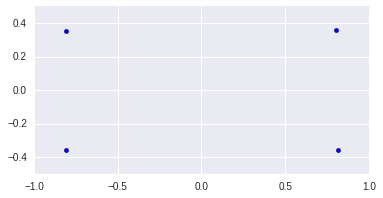

In [25]:
new_verts = (floor_verts - model.mean_) @ new_components.T
plt.scatter(x=new_verts[:, 0], y=new_verts[:, 1]);
plt.gca().set_aspect('equal');

In [26]:
new_components

array([[ 1.08733909e-01,  1.62176600e-03,  9.94069568e-01],
       [-9.93952849e-01, -1.52329476e-02,  1.08745994e-01],
       [-1.53189702e-02,  9.99882657e-01,  4.43790033e-05]])

## Make a Function that does the above

In [65]:
from typing import NewType, Tuple

Transformation = NewType("Transformation", Tuple[np.ndarray, np.ndarray])

def arena_obj_to_transformation(objfile: str, object: str="Arena") -> Transformation:
    """Returns the 3x3 rotation matrix and 1x3 translation array for the "object" object in the objfile, using PCA."""
    verts = wavefront_reader.read_objfile(objfile)[object]['v']
    uverts = np.unique(verts, axis=0)
    floor_verts = uverts[uverts[:,1].argsort()][:4, :]
    pca = PCA(n_components=3).fit(floor_verts)
    rotmat, translation = pca.components_, pca.mean_
    return rotmat, translation

rotmat, trans = arena_obj_to_transformation('arena2.obj')
# actually we need not to move arena up, but down instead as OptiTrack markers are on the top
trans[1] = top_verts[0][1]
rotmat, trans

(array([[ 1.08733909e-01,  1.62176600e-03,  9.94069568e-01],
        [-9.93952849e-01, -1.52329476e-02,  1.08745994e-01],
        [-1.53189702e-02,  9.99882657e-01,  4.43790033e-05]]),
 array([0.0173365, 0.383428 , 0.0152375]))

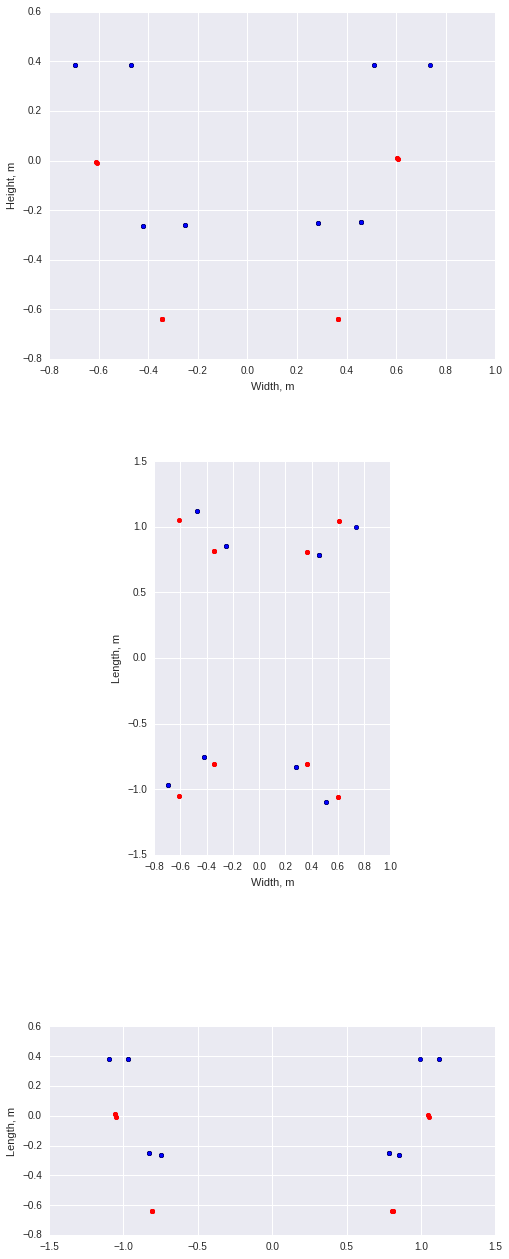

In [67]:
verts = wavefront_reader.read_objfile('arena2.obj')['Arena']['v']
exp_verts = (verts - trans) @ rotmat.T

# exp_verts: x(0) -> x(1), z(2) -> z(0), y(1) -> y(2)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 24))

ax1.scatter(verts[:, 0], verts[:, 1]);
ax1.scatter(exp_verts[:, 1], exp_verts[:, 2], color='red');
ax1.set_aspect('equal')
ax1.set_ylabel('Height, m')
ax1.set_xlabel('Width, m')

ax2.scatter(verts[:, 0], verts[:, 2]);
ax2.scatter(exp_verts[:, 1], exp_verts[:, 0], color='red');
ax2.set_aspect('equal')
ax2.set_ylabel('Length, m')
ax2.set_xlabel('Width, m')

ax3.scatter(verts[:, 2], verts[:, 1]);
ax3.scatter(exp_verts[:, 0], exp_verts[:, 2], color='red');
ax3.set_aspect('equal')
ax3.set_aspect('equal')
ax3.set_ylabel('Length, m')


### In this case, as everyhting is oriented accordign to the floor, the top points look off becasue the physical floor is a little bit off. 